In [ ]:
import pandas as pd
import datetime 
import os
import numpy as np

# Backup

In [1477]:
# linkedIn['yearstrip'] = linkedIn['Date (ISO Year Week)'].str.split(',').str[1].str.strip().str[:5]
# linkedIn['yearstrip'] = linkedIn['yearstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_year'] = linkedIn['yearstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['Date (ISO Year Week)'].str.split('(').str[1].str.strip().str[5:7]
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(')'))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: '0'+x if len(x)<2 else x)
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn = linkedIn[['model_week', 'Campaign group name', 'Total spent', 'iso_week', 'iso_year', 'model_week']].rename({'Total spent':'linkedIn_search_ad_spend', 'Campaign group name':'Country/Territory'}, axis=1)


# Code

In [1478]:
folder_path = "data/usaonlyanalysis"
# filenames = os.listdir(folder_path)
# print(filenames)
# for i in range(0, len(filenames)):
#     print(filenames[i])
#     print(i)

# Raw Imports

In [1578]:
podcasts_raw = pd.read_csv(folder_path + '/' + 'TPE Podcast Downloads_2022-01-01_to_2025-06-05.csv')
linkedIn_raw = pd.read_csv(folder_path + '/' + 'Impact_ Linkedin Ads Overview Report v2_NA - D_W_M_Table.csv')
paidgifting_raw = pd.read_csv(folder_path + '/' +  'paid_Gifting.csv')
fb_raw = pd.read_csv(folder_path + '/' + 'Impact_ Facebook Ads Overview Report_NA - D_W_M + Creatives_Table.csv')
events_raw = pd.read_csv(folder_path + '/' + 'EventsDataAgg - usonly.csv')
mqls_raw = pd.read_csv(folder_path + '/' + 'daily_mqls_pulled_20250617.csv')
# mqls_raw = pd.read_csv(folder_path + '/' + 'mql_exclude_admin.csv')
emails_raw = pd.read_csv(folder_path + '/' + 'emailsWithFilterFlag.csv')
google_search_raw = pd.read_csv(folder_path + '/' + 'GoogleSearchConsulExport-USOnly-DailyImpressions.csv')
google_ads_raw = pd.read_csv(folder_path + '/' +  'DEPT Initial Report - US ONLY.csv')
direct_raw = pd.read_csv(folder_path + '/' + 'DirectBuy.csv')
google_events_ga4_2024 = pd.read_csv(folder_path+'/'+'2024 Google Analytics Data.csv')
google_events_ga4_2025 = pd.read_csv(folder_path+'/'+'2025 Google Analytics Data.csv')


# GA4 Web Events Data

In [1579]:
google_events_ga4_2025['Date'].min()
google_events_ga4_2025['Date'].max()

'Set-Cookie:crlf=injection'

In [1580]:
google_web_events_ga4 = pd.concat([google_events_ga4_2025, google_events_ga4_2024], ignore_index=True)
google_web_events_ga4 = google_web_events_ga4[google_web_events_ga4['Date']!='Set-Cookie:crlf=injection']

In [1581]:
google_web_events_ga4['date'] = google_web_events_ga4['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())
google_web_events_ga4['iso_week'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().week)
google_web_events_ga4['iso_year'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().year)
google_web_events_ga4['weekstr'] = google_web_events_ga4['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_web_events_ga4['yearstr'] = google_web_events_ga4['iso_year'].apply(lambda x: str(x))
google_web_events_ga4['model_week_str'] = google_web_events_ga4['yearstr'] + google_web_events_ga4['weekstr']
google_web_events_ga4['model_week'] =google_web_events_ga4['model_week_str'].apply(lambda x: int(x))
google_web_events_ga4 = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'Sessions', 'Page location']].rename({'Sessions':'ga4_sessions', 'Page location':'ga4_page_path'}, axis=1)


google_web_events_ga4['path_split'] = google_web_events_ga4['ga4_page_path'].str.split('/')
google_web_events_ga4['domain'] = google_web_events_ga4['path_split'].apply(lambda x: x[2])
google_web_events_ga4['domainsub1'] = google_web_events_ga4['path_split'].apply(lambda x: x[3] if len(x)>3 else '')

## Daily All Data

In [1582]:
google_daily_traffic = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

## Daily ImpactDotCom

In [1583]:
impactDotComPageInclusions =  pd.read_csv(folder_path+'/'+'ga4_domain_data_summary - mpact.com-domain-summary.csv')
impactDotComPageInclusions = impactDotComPageInclusions[impactDotComPageInclusions['Include']=='Yes']

In [1584]:
impactDotComPageInclusions.fillna('')
impactDotComPageInclusions

,Unnamed: 0,domainsub1,ga4_sessions,Include
0,0,NaN,3572169,Yes
1,1,partners,440737,Yes
2,2,affiliate-marketing,283069,Yes
3,3,request-a-demo-for-brands,165854,Yes
4,4,integrated-platform-prices,118149,Yes
...,...,...,...,...
70,70,find-influencers,279,Yes
72,72,onesheets,267,Yes
73,73,saasquatch,240,Yes
74,74,warc-research-report,230,Yes


In [1585]:
impactDotComPageExclusions = ['request-a-demo-for-brands',
 'request-a-demo-for-publishers',
 'request-a-demo-thank-you']

In [1586]:
impactDotCom_daily_ga4 = google_web_events_ga4[(google_web_events_ga4['domain']=='impact.com') &(google_web_events_ga4['domainsub1'].isin(impactDotComPageInclusions['domainsub1']))  & (google_web_events_ga4['domainsub1'].isin(impactDotComPageExclusions)==False)]

In [1587]:
impactDotCom_daily_ga4[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().to_csv('domainsub.csv')

In [1588]:
impactDotCom_daily_traffic = impactDotCom_daily_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index().rename({'ga4_sessions':'impactDotCom_ga4_sessions'}, axis=1)

In [1589]:
impactDotCom_daily_traffic

,model_week,date,iso_week,iso_year,impactDotCom_ga4_sessions
0,202415,2024-04-11,15,2024,4972.0
1,202415,2024-04-12,15,2024,4538.0
2,202415,2024-04-13,15,2024,2430.0
3,202415,2024-04-14,15,2024,2546.0
4,202416,2024-04-15,16,2024,7164.0
...,...,...,...,...,...
421,202523,2025-06-06,23,2025,2399.0
422,202523,2025-06-07,23,2025,923.0
423,202523,2025-06-08,23,2025,2623.0
424,202524,2025-06-09,24,2025,2879.0


### Demo Requests

In [1590]:
demoRequests = google_web_events_ga4[(google_web_events_ga4['domain']=='impact.com') & (google_web_events_ga4['domainsub1'].isin(['request-a-demo-thank-you', 'request-a-demo-for-brands'])==True)]

In [1591]:
demoRequests[['domainsub1', 'date', 'ga4_sessions']].groupby(['domainsub1', 'date']).sum().reset_index().sort_values('date')

,domainsub1,date,ga4_sessions
0,request-a-demo-for-brands,2024-04-12,318.0
420,request-a-demo-thank-you,2024-04-12,80.0
1,request-a-demo-for-brands,2024-04-13,278.0
2,request-a-demo-for-brands,2024-04-14,119.0
3,request-a-demo-for-brands,2024-04-15,398.0
...,...,...,...
415,request-a-demo-for-brands,2025-06-06,332.0
416,request-a-demo-for-brands,2025-06-07,258.0
417,request-a-demo-for-brands,2025-06-08,369.0
418,request-a-demo-for-brands,2025-06-09,295.0


In [1592]:
demoRequests.sort_values('ga4_sessions')

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1
81858,202511,2025-03-14,11,2025,74.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands
98071,202517,2025-04-27,17,2025,74.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
97676,202517,2025-04-25,17,2025,74.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
97327,202517,2025-04-24,17,2025,74.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands
96821,202517,2025-04-23,17,2025,74.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
...,...,...,...,...,...,...,...,...,...
108246,202442,2024-10-16,42,2024,795.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands
5263,202519,2025-05-06,19,2025,811.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands
105980,202437,2024-09-12,37,2024,1034.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands
3601,202517,2025-04-22,17,2025,1107.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands


In [1593]:
demo_request_traffic = demoRequests[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index().rename({'ga4_sessions':'demo_requests'}, axis=1)

In [1594]:
demo_request_traffic

,model_week,date,iso_week,iso_year,demo_requests
0,202415,2024-04-12,15,2024,398.0
1,202415,2024-04-13,15,2024,278.0
2,202415,2024-04-14,15,2024,119.0
3,202416,2024-04-15,16,2024,398.0
4,202416,2024-04-16,16,2024,398.0
...,...,...,...,...,...
415,202523,2025-06-06,23,2025,332.0
416,202523,2025-06-07,23,2025,258.0
417,202523,2025-06-08,23,2025,369.0
418,202524,2025-06-09,24,2025,295.0


In [1595]:
demoRequests['domainsub2'] = demoRequests['path_split'].apply(lambda x: x[4]if len(x)>4 else '')
demoRequests['domainsub3'] = demoRequests['path_split'].apply(lambda x: x[5]if len(x)>5 else '')
demoRequests['domainsub4'] = demoRequests['path_split'].apply(lambda x: x[6]if len(x)>6 else '')

/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_28481/1608364720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demoRequests['domainsub2'] = demoRequests['path_split'].apply(lambda x: x[4]if len(x)>4 else '')
/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_28481/1608364720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demoRequests['domainsub3'] = demoRequests['path_split'].apply(lambda x: x[5]if len(x)>5 else '')
/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_284

In [1596]:
demoRequests

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1,domainsub2,domainsub3,domainsub4
3601,202517,2025-04-22,17,2025,1107.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?utm_source=marketing-dive&utm_medium=paid-dir...,,
5263,202519,2025-05-06,19,2025,811.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?utm_source=banking-dive&utm_medium=paid-direc...,,
5470,202511,2025-03-13,11,2025,775.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?utm_source=banking-dive&utm_medium=paid-direc...,,
6388,202506,2025-02-06,6,2025,664.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
6675,202523,2025-06-05,23,2025,664.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
191416,202420,2024-05-15,20,2024,80.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
196365,202422,2024-05-31,22,2024,80.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
197008,202423,2024-06-03,23,2024,80.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
197363,202423,2024-06-04,23,2024,80.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,


In [1597]:
demoRequests[(demoRequests['date']>=pd.Timestamp('2025-01-02').date()) & (demoRequests['date']<pd.Timestamp('2025-01-06').date())]

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1,domainsub2,domainsub3,domainsub4
8179,202501,2025-01-02,1,2025,516.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
9446,202501,2025-01-05,1,2025,443.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
11178,202501,2025-01-04,1,2025,369.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
21831,202501,2025-01-03,1,2025,184.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
56500,202501,2025-01-02,1,2025,74.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?gclid=Cj0KCQiAj9m7BhD1ARIsANsIIvBl8n1wH1h9Pwu...,,
56501,202501,2025-01-02,1,2025,74.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
56805,202501,2025-01-03,1,2025,74.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?irclickid=Xbk1sCTtKxyKRCw3AkxxGWAPUkCSsGQxpTQ...,,
56950,202501,2025-01-04,1,2025,74.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?gclid=CjwKCAiA1eO7BhATEiwAm0Ee-BtAb5oIfkUfLW0...,,
57118,202501,2025-01-05,1,2025,74.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?gclid=CjwKCAiA-Oi7BhA1EiwA2rIu249BxOazpo0xExp...,,


In [1598]:
demoRequests.loc[56500]['domainsub2']

'?gclid=Cj0KCQiAj9m7BhD1ARIsANsIIvBl8n1wH1h9Pwu9GAdaHIVFR19sgpo-8Xv8o4QdT0Xn0PvMj-2-AlYaAt29EALw_wcB&irclickid=0uWXsYQomxyKR3T3tJxQHUYkUkCSeJ2bUy9WUo0&sharedid=&irpid=56411&utm_source=impact.com&utm_medium=referral&utm_campaign=partner-program&irgwc=1'

In [1599]:
demoRequests[demoRequests['ga4_sessions']==119]

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1,domainsub2,domainsub3,domainsub4
154149,202415,2024-04-14,15,2024,119.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
154838,202416,2024-04-21,16,2024,119.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
155777,202418,2024-04-30,18,2024,119.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
156421,202419,2024-05-07,19,2024,119.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
156880,202419,2024-05-12,19,2024,119.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
157932,202421,2024-05-21,21,2024,119.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
158516,202422,2024-05-27,22,2024,119.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
159798,202423,2024-06-07,23,2024,119.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you,,,
161977,202426,2024-06-28,26,2024,119.0,https://impact.com/request-a-demo-for-brands/,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,,,
163779,202429,2024-07-16,29,2024,119.0,https://impact.com/request-a-demo-for-brands/?...,"[https:, , impact.com, request-a-demo-for-bran...",impact.com,request-a-demo-for-brands,?utm_source=website&utm_medium=organic_web&utm...,,


In [1600]:
impactDotCom_daily_traffic_exc = impactDotCom_daily_ga4_exc[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index().rename({'ga4_sessions':'impactDotCom_ga4_sessions_exc'}, axis=1)

In [1601]:
compare = pd.merge(impactDotCom_daily_traffic_exc, impactDotCom_daily_traffic, on ='date')

In [1602]:
compare['percTotal'] = compare['impactDotCom_ga4_sessions_exc']/compare['impactDotCom_ga4_sessions']

In [1603]:
compare['percTotal']

0      0.070075
1      0.114403
2      0.046740
3      0.055556
4      0.086976
         ...   
415    0.138391
416    0.279523
417    0.140679
418    0.102466
419    0.152503
Name: percTotal, Length: 420, dtype: float64

## Path Analysis

In [1604]:
page_path_summary = google_web_events_ga4[['ga4_page_path', 'ga4_sessions']].groupby('ga4_page_path').sum().sort_values(by='ga4_sessions', ascending=False).reset_index()
page_path_summary[page_path_summary['ga4_sessions']>800000]

,ga4_page_path,ga4_sessions
0,https://app.impact.com/login.user,13102875.0
1,https://app.impact.com/secure/mediapartner/hom...,9258248.0
2,https://impact.com/,3572169.0
3,https://app.impact.com/secure/advertiser/engag...,2789849.0
4,https://app.impact.com/secure/device/auth.ihtml,2618199.0
5,https://app.impact.com/signup/none/create-new-...,2223282.0
6,https://app.impact.com/insertionorder/partner-...,1934316.0
7,https://demo.impact.com/login.user,1446796.0
8,https://app.impact.com/secure/mediapartner/mar...,1129091.0
9,https://app.impact.com/loginError.user,1114263.0


In [1605]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')

In [1606]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')
page_path_summary['domain'] = page_path_summary['path_split'].apply(lambda x: x[2])
page_path_summary['domainsub1'] = page_path_summary['path_split'].apply(lambda x: x[3] if len(x)>3 else '')
page_path_summary['domainsub2'] = page_path_summary['path_split'].apply(lambda x: x[4]if len(x)>4 else '')
page_path_summary['domainsub3'] = page_path_summary['path_split'].apply(lambda x: x[5]if len(x)>5 else '')
page_path_summary['domainsub4'] = page_path_summary['path_split'].apply(lambda x: x[6]if len(x)>6 else '')

In [1607]:
domain_summary = page_path_summary[['domain', 'ga4_sessions']].groupby('domain').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1608]:
domain_summary.to_csv('ga4_domain_data_summary.csv')

In [1609]:
page_path_summary['domain']

0                   app.impact.com
1                   app.impact.com
2                       impact.com
3                   app.impact.com
4                   app.impact.com
                   ...            
22135               app.impact.com
22136               app.impact.com
22137               app.impact.com
22138    creators.audibletrial.com
22139    creators.audibletrial.com
Name: domain, Length: 22140, dtype: object

In [1610]:
impactDotComPages = page_path_summary[page_path_summary['domain']=='impact.com']

In [1611]:
impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

,domainsub1,ga4_sessions
0,,3572169.0
1,partners,440737.0
2,affiliate-marketing,283069.0
3,request-a-demo-for-brands,165854.0
4,integrated-platform-prices,118149.0
...,...,...
130,?utm_source=linkedin&utm_medium=brand-organic-...,74.0
131,?_gl=xxxxxxxxxxxxxxxxxx&gclid=Cj0KCQiA-5a9BhCB...,74.0
132,impact-com-creator-influencer-marketing-platfo...,74.0
133,?utm_source=stripe.com&utm_medium=referral&utm...,74.0


In [1612]:
impactDotComPagesSummary = impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1613]:
impactDotComPagesSummary.to_csv('impactDotComPagesSummary.csv')

# Google Ads

In [1614]:
google_ads = google_ads_raw.copy()
google_ads = google_ads[google_ads['Currency code']=='USD']
google_ads['date'] = google_ads['Day'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_ads['iso_week'] = google_ads['date'].apply(lambda x: x.isocalendar().week)
google_ads['iso_year'] = google_ads['date'].apply(lambda x: x.isocalendar().year)
google_ads['weekstr'] = google_ads['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_ads['yearstr'] = google_ads['iso_year'].apply(lambda x: str(x))
google_ads['model_week_str'] = google_ads['yearstr'] + google_ads['weekstr']
google_ads['model_week'] =google_ads['model_week_str'].apply(lambda x: int(x))
google_ads = google_ads[['model_week', 'date', 'iso_week', 'iso_year', 'Cost', 'Impr.']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Cost':'googleAds_spend', 'Impr.':'googleAds_impressions'}, axis=1).reset_index()

In [1615]:
google_ads

,model_week,date,iso_week,iso_year,googleAds_spend,googleAds_impressions
0,201141,2011-10-13,41,2011,0.00,0
1,201142,2011-10-18,42,2011,580.00,"276,820"
2,201142,2011-10-19,42,2011,537.27,"324,325"
3,201142,2011-10-20,42,2011,645.76,"330,915"
4,201142,2011-10-21,42,2011,95.77,"3,520"
...,...,...,...,...,...,...
4548,202523,2025-06-06,23,2025,4599.39,"7,5840"
4549,202523,2025-06-07,23,2025,3656.27,"6,225"
4550,202523,2025-06-08,23,2025,3816.07,"5,7320"
4551,202524,2025-06-09,24,2025,5089.73,"9,0390"


# Podcast

In [1616]:
podcasts = podcasts_raw.copy()
podcasts['date'] = podcasts['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
podcasts['iso_week'] = podcasts['date'].apply(lambda x: x.isocalendar().week)
podcasts['iso_year'] = podcasts['date'].apply(lambda x: x.isocalendar().year)
podcasts['weekstr'] = podcasts['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
podcasts['yearstr'] = podcasts['iso_year'].apply(lambda x: str(x))
podcasts['model_week_str'] = podcasts['yearstr'] + podcasts['weekstr']
podcasts['model_week'] =podcasts['model_week_str'].apply(lambda x: int(x))
podcasts = podcasts[['model_week', 'date', 'iso_week', 'iso_year', 'Downloads']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Downloads':'podcast_streams'}, axis=1).reset_index()

In [1617]:
podcasts['date']

0       2022-06-03
1       2022-06-04
2       2022-06-05
3       2022-06-06
4       2022-06-07
           ...    
1094    2025-06-01
1095    2025-06-02
1096    2025-06-03
1097    2025-06-04
1098    2025-06-05
Name: date, Length: 1099, dtype: object

# LinkedIn

In [1618]:
linkedIn = linkedIn_raw.copy()


In [1619]:
linkedIn = linkedIn_raw.copy()
linkedIn['date'] = linkedIn['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
linkedIn['iso_week'] = linkedIn['date'].apply(lambda x: x.isocalendar().week)
linkedIn['iso_year'] = linkedIn['date'].apply(lambda x: x.isocalendar().year)
linkedIn['weekstr'] = linkedIn['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
linkedIn['yearstr'] = linkedIn['iso_year'].apply(lambda x: str(x))
linkedIn['model_week_str'] = linkedIn['yearstr'] + linkedIn['weekstr']
linkedIn['model_week'] =linkedIn['model_week_str'].apply(lambda x: int(x))
linkedIn = linkedIn[['model_week', 'date', 'iso_week', 'iso_year', 'Total spent', 'Impressions','Clicks' ]].rename({'Total spent':'linkedin_spend','Impressions':'linkedin_impressions', 'Clicks':'linkedin_clicks' }, axis=1)

# FB

In [1620]:
fb_raw

,Date,Amount spent,Impressions,Link clicks,CTR (link click-through rate),CPM,CPC (link),On-Facebook leads,Cost per on-Facebook lead,Website conversions,Frequency
0,"Jun 11, 2025",712.51,38520,171,0.004439,18.497144,4.166725,11,64.773636,53,NaN
1,"Jun 10, 2025",2294.01,143786,680,0.004729,15.954335,3.373544,58,39.551897,237,NaN
2,"Jun 9, 2025",2274.63,143534,719,0.005009,15.847325,3.163602,49,46.421020,272,NaN
3,"Jun 8, 2025",2374.80,147653,759,0.005140,16.083656,3.128854,52,45.669231,243,NaN
4,"Jun 7, 2025",2265.68,142247,766,0.005385,15.927788,2.957807,51,44.425098,258,NaN
...,...,...,...,...,...,...,...,...,...,...,...
855,"Jan 7, 2023",1041.89,54117,295,0.005451,19.252545,3.531831,20,52.094500,31,NaN
856,"Jan 6, 2023",1052.34,58945,307,0.005208,17.852914,3.427818,14,75.167143,37,NaN
857,"Jan 5, 2023",1047.54,55214,303,0.005488,18.972362,3.457228,12,87.295000,43,NaN
858,"Jan 4, 2023",1048.24,49117,283,0.005762,21.341694,3.704028,20,52.412000,32,NaN


In [1621]:
fb = fb_raw.copy()
fb['date'] = fb['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
fb['iso_week'] = fb['date'].apply(lambda x: x.isocalendar().week)
fb['iso_year'] = fb['date'].apply(lambda x: x.isocalendar().year)
fb['weekstr'] = fb['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
fb['yearstr'] = fb['iso_year'].apply(lambda x: str(x))
fb['model_week_str'] = fb['yearstr'] + fb['weekstr']
fb['model_week'] =fb['model_week_str'].apply(lambda x: int(x))
fb = fb[['model_week', 'date', 'iso_week', 'iso_year', 'Amount spent', 'Impressions','Link clicks' ]].rename({'Amount spent':'fb_spend','Impressions':'fb_impressions', 'Link clicks':'fb_clicks' }, axis=1)


In [1622]:
fb

,model_week,date,iso_week,iso_year,fb_spend,fb_impressions,fb_clicks
0,202524,2025-06-11,24,2025,712.51,38520,171
1,202524,2025-06-10,24,2025,2294.01,143786,680
2,202524,2025-06-09,24,2025,2274.63,143534,719
3,202523,2025-06-08,23,2025,2374.80,147653,759
4,202523,2025-06-07,23,2025,2265.68,142247,766
...,...,...,...,...,...,...,...
855,202301,2023-01-07,1,2023,1041.89,54117,295
856,202301,2023-01-06,1,2023,1052.34,58945,307
857,202301,2023-01-05,1,2023,1047.54,55214,303
858,202301,2023-01-04,1,2023,1048.24,49117,283


# Google Search

In [1623]:
google_search = google_search_raw.copy() 

In [1624]:
google_search

,Date,Clicks,Impressions,CTR,Position
0,2025-06-04,1302,95609,1.36%,23.85
1,2025-06-03,1439,89275,1.61%,23.24
2,2025-06-02,1332,96166,1.39%,25.65
3,2025-06-01,469,70008,0.67%,29.57
4,2025-05-31,437,68313,0.64%,30.08
...,...,...,...,...,...
481,2024-02-09,1177,30566,3.85%,22.44
482,2024-02-08,1272,33018,3.85%,19.90
483,2024-02-07,1444,34593,4.17%,20.09
484,2024-02-06,1559,37451,4.16%,20.79


In [1625]:
google_search['date'] = google_search['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_search['iso_week'] = google_search['date'].apply(lambda x: x.isocalendar().week)
google_search['iso_year'] = google_search['date'].apply(lambda x: x.isocalendar().year)
google_search['weekstr'] = google_search['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_search['yearstr'] = google_search['iso_year'].apply(lambda x: str(x))
google_search['model_week_str'] = google_search['yearstr'] + google_search['weekstr']
google_search['model_week'] =google_search['model_week_str'].apply(lambda x: int(x))
google_search = google_search[['model_week', 'date', 'iso_week', 'iso_year', 'Clicks', 'Impressions']].rename({'Clicks':'gSearch_sessions', 'Impressions':'gSearch_impressions'}, axis=1)

In [1626]:
google_search

,model_week,date,iso_week,iso_year,gSearch_sessions,gSearch_impressions
0,202523,2025-06-04,23,2025,1302,95609
1,202523,2025-06-03,23,2025,1439,89275
2,202523,2025-06-02,23,2025,1332,96166
3,202522,2025-06-01,22,2025,469,70008
4,202522,2025-05-31,22,2025,437,68313
...,...,...,...,...,...,...
481,202406,2024-02-09,6,2024,1177,30566
482,202406,2024-02-08,6,2024,1272,33018
483,202406,2024-02-07,6,2024,1444,34593
484,202406,2024-02-06,6,2024,1559,37451


# Paid Gifting

In [1627]:
paidgifting = paidgifting_raw.dropna().copy()
paidgifting['date']= paidgifting['gift_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
paidgifting['iso_week'] = paidgifting['date'].apply(lambda x: x.isocalendar().week)
paidgifting['iso_year'] = paidgifting['date'].apply(lambda x: x.isocalendar().year)
paidgifting['weekstr'] = paidgifting['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
paidgifting['yearstr'] = paidgifting['iso_year'].apply(lambda x: str(x))
paidgifting['model_week_str'] = paidgifting['yearstr'] + paidgifting['weekstr']
paidgifting['model_week'] =paidgifting['model_week_str'].apply(lambda x: int(x))
paidgifting = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_cost']].rename({'gift_cost':'gift_spend'}, axis=1)
paidgifting_daily = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_spend']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

# MQLs

In [1628]:
mqls_raw['date'].dtype

dtype('O')

In [1629]:
mqls_raw[mqls_raw['mql_count']>50]

,date,mql_count
62,2018-01-30,111
111,2025-04-22,1743
119,2021-05-01,58
122,2021-08-19,77
123,2021-08-24,67
...,...,...
2841,2023-03-30,81
2843,2023-04-10,75
2846,2023-04-26,64
2848,2023-05-02,63


In [1630]:
mqls = mqls_raw.copy()
mqls['date']= mqls['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
mqls['iso_week'] = mqls['date'].apply(lambda x: x.isocalendar().week)
mqls['iso_year'] = mqls['date'].apply(lambda x: x.isocalendar().year)
mqls['weekstr'] = mqls['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
mqls['yearstr'] = mqls['iso_year'].apply(lambda x: str(x))
mqls['model_week_str'] = mqls['yearstr'] + mqls['weekstr']
mqls['model_week'] = mqls['model_week_str'].apply(lambda x: int(x))
mqls['mql_count'] = mqls['mql_count'].fillna(0)
mqls= mqls[['model_week', 'iso_week', 'iso_year', 'date', 'mql_count']]


# Emails

In [1631]:
emails_raw.columns

Index(['Email Name', 'Sent', 'Delivered', '% Delivered', 'Hard Bounced',
       'Soft Bounced', 'Pending', 'Opened', '% Opened', 'Clicked Email',
       '% Clicked Email', 'Clicked to Opened Ratio', 'Unsubscribed',
       '% Unsubscribed', 'First Activity (PDT)', 'Last Activity (PDT)',
       'Include', 'days_between'],
      dtype='object')

In [1632]:
emails = emails_raw[emails_raw['Include']==1].copy()
emails['date'] = emails['First Activity (PDT)'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y %I:%M %p").date())
emails['iso_week'] = emails['date'].apply(lambda x: x.isocalendar().week)
emails['iso_year'] = emails['date'].apply(lambda x: x.isocalendar().year)
emails['weekstr'] = emails['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
emails['yearstr'] = emails['iso_year'].apply(lambda x: str(x))
emails['model_week_str'] = emails['yearstr'] + emails['weekstr']
emails['model_week'] =emails['model_week_str'].apply(lambda x: int(x))
emails = emails[['model_week', 'date', 'iso_week', 'iso_year', 'Sent', 'Delivered','Opened' ]].rename({'Sent':'email_sent_cnt','Delivered':'email_delivered_cnt', 'Opened':'email_opened_cnt' }, axis=1)
for var in ['email_sent_cnt', 'email_delivered_cnt','email_opened_cnt']:
    print(var)
    emails[var]=emails[var].apply(lambda x: int(x.replace(",", "")))
emails_daily = emails[['model_week', 'date', 'iso_week', 'iso_year', 'email_sent_cnt', 'email_delivered_cnt', 'email_opened_cnt']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

email_sent_cnt
email_delivered_cnt
email_opened_cnt


In [1633]:
emails_daily

,model_week,date,iso_week,iso_year,email_sent_cnt,email_delivered_cnt,email_opened_cnt
0,202323,2023-06-06,23,2023,1334,1200,883
1,202323,2023-06-07,23,2023,1134,1078,354
2,202323,2023-06-08,23,2023,245,237,45
3,202324,2023-06-12,24,2023,383,373,223
4,202324,2023-06-13,24,2023,26356,24876,8479
...,...,...,...,...,...,...,...
165,202520,2025-05-15,20,2025,58034,53964,9379
166,202521,2025-05-20,21,2025,488,488,302
167,202522,2025-05-27,22,2025,565,564,376
168,202523,2025-06-02,23,2025,2458,2371,997


# Direct

In [1634]:
direct_raw

,Status,QTR,Vertical,Month,TYPE,Launch date,Vendor,Publication (see Audience breakdown tab for details),Channel,Cost,Cost_MMM,Date_ MMM
0,Complete,Q1,Marketing,March,Lead gen campaign,3/3/2025,Morning Brew,Marketing Brew,Newsletter,NaN,$1.00,3/3/2025
1,Complete,Q1,Marketing,March,Lead gen campaign,2/15/2025,PharosIQ,PharosIS,Lead gen,"$200,000.00","$200,000.00",2/15/2025
2,Complete,Q1,Finserv,March,Lead gen campaign,3/10/2025,Industry dive,Banking Dive,Newsletter,"$7,000.00","$7,000.00",3/10/2025
3,Complete,Q1,Retail,March,Lead gen campaign,3/18/2025,Industry dive,Retail Dive,Eblast,"$8,000.00","$8,000.00",3/18/2025
4,Complete,Q1,Marketing,March,Lead gen campaign,3/18/2025,Workweek,Marketing Millenials,Newsletter ad,"$11,711.00","$11,711.00",3/18/2025
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,Q1,General,March,NaN,"3/8 , 3/12",Growth Hackers Daily,Growth Hackers Daily,"8 ads $6,000 (1 takeover, 2 primaries, and 5 s...","$6,000.00","$3,000.00",03/12/2023
176,NaN,Q1,General,March,NaN,3/9/2023,Industry Dive,Marketing Dive Email Blast,Eblast,"$12,000.00","$12,000.00",3/9/2023
177,NaN,Q1,Creator,March,NaN,3/9/2023,Industry Dive,Social media dive,Newsletter,"$12,500.00","$12,500.00",3/9/2023
178,NaN,Q1,Retail,March,NaN,3/9/2023,Industry Dive,Retail Dive Email Blast,Eblast,"$10,500.00","$10,500.00",3/9/2023


In [1635]:
direct= direct_raw.copy()
direct['date']= direct['Date_ MMM'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())


direct['iso_week'] = direct['date'].apply(lambda x: x.isocalendar().week)
direct['iso_year'] = direct['date'].apply(lambda x: x.isocalendar().year)
direct['weekstr'] = direct['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
direct['yearstr'] = direct['iso_year'].apply(lambda x: str(x))
direct['model_week_str'] = direct['yearstr'] + direct['weekstr']
direct['model_week'] =direct['model_week_str'].apply(lambda x: int(x))
direct['Cost_MMM'] = direct['Cost_MMM'].apply(lambda x: float(x.replace(',','').replace('$','')) if type(x)!=float else x)
direct = direct[['model_week', 'date', 'iso_week', 'iso_year', 'Cost_MMM' ]].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Cost_MMM':'direct_spend'}, axis=1)


# Events

In [1636]:
events = events_raw[events_raw['Region']=='NAM']
events = events[events['Event Actual Cost - Pls input in SF campaign'].isnull()==False]
events['date']= events['Event Start Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())
events['iso_week'] = events['date'].apply(lambda x: x.isocalendar().week)
events['iso_year'] = events['date'].apply(lambda x: x.isocalendar().year)
events['weekstr'] = events['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
events['yearstr'] = events['iso_year'].apply(lambda x: str(x))
events['model_week_str'] = events['yearstr'] + events['weekstr']
events['model_week'] =events['model_week_str'].apply(lambda x: int(x))
events = events[['model_week', 'date', 'iso_week', 'iso_year', 'Event Actual Cost - Pls input in SF campaign']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Event Actual Cost - Pls input in SF campaign':'event_spend'}, axis=1).reset_index()


In [1637]:
events

,model_week,date,iso_week,iso_year,event_spend
0,202304,2023-01-23,4,2023,18298.0
1,202309,2023-02-28,9,2023,69279.0
2,202313,2023-03-27,13,2023,66790.0
3,202313,2023-04-02,13,2023,40918.0
4,202314,2023-04-04,14,2023,29270.0
5,202318,2023-05-04,18,2023,45043.0
6,202324,2023-06-13,24,2023,916994.0
7,202325,2023-06-20,25,2023,16500.0
8,202331,2023-07-31,31,2023,26351.0
9,202337,2023-09-11,37,2023,65465.0


# Combined DF

In [1716]:
combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, events, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, impactDotCom_daily_traffic, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape

combined['month'] = combined['date'].apply(lambda x: x.month)


In [1717]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,34666.0,1727.34,51080.0,249.0,6233.39,"12,4000",NaN,340,3220.0,10


In [1718]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 263 non-null    float64
 12  email_sent_cnt             89 non-null     float64
 13  email_delivered_cnt        89 non-null     float64

In [1719]:
convert_fields = ['googleAds_impressions']
for var in convert_fields:
    combined[var] = combined[var].fillna('0')
    combined[var] = combined[var].apply(lambda x: float(x.replace(',','').replace('$','')))
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 263 non-null    float64
 12  email_sent_cnt             89 non-null     float64
 13  email_delivered_cnt        89 non-null     float64

In [1720]:
gaSpend_missing = combined[combined['googleAds_spend'].isnull()==True]
gaSpend_missing[['date']]

,date
51,2024-06-01
52,2024-06-02
385,2025-05-01
386,2025-05-02
387,2025-05-03
388,2025-05-04


In [1721]:
fb_missing = combined[combined['fb_spend'].isnull()==True]
fb_missing[['date']]

,date
191,2024-10-19
192,2024-10-20
193,2024-10-21
194,2024-10-22
195,2024-10-23
196,2024-10-24
197,2024-10-25
198,2024-10-26
199,2024-10-27
200,2024-10-28


In [1722]:
# spendVars = ['gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend', 'event_spend']
# for var in spendVars:
#     if combined[var].dtype != float:
#         print(combined[var].dtype)
#         combined[var] = combined[var].apply(lambda x: x.replace(',','').replace('$',''))

In [1723]:
combined[combined['event_spend']>0]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
5,202416,2024-04-16,16,2024,224572.0,151.0,10460.650000,168669,1158,1210.0,...,NaN,2164.09,105145.0,504.0,5447.02,84700.0,25720.0,52,4576.0,4
27,202419,2024-05-08,19,2024,242263.0,499.0,14448.280000,183731,1141,1300.0,...,NaN,2956.35,201448.0,810.0,7407.86,100150.0,17744.0,85,6249.0,5
54,202423,2024-06-04,23,2024,262643.0,4618.0,14440.410000,203812,1407,1266.0,...,9000.0,3033.01,180083.0,1064.0,6883.98,98100.0,6250.0,59,4098.0,6
109,202431,2024-07-29,31,2024,217530.0,53.0,13139.029991,244591,1284,1264.0,...,NaN,2449.76,114597.0,750.0,6749.88,157200.0,17744.0,120,4252.0,7
181,202441,2024-10-09,41,2024,224124.0,204.0,13807.429987,183029,1059,1176.0,...,NaN,1656.77,46939.0,279.0,6492.83,82520.0,36289.0,74,5047.0,10
200,202444,2024-10-28,44,2024,224246.0,100.0,6746.980000,109784,774,1217.0,...,NaN,NaN,NaN,NaN,3465.12,47260.0,21057.0,36,3973.0,10
222,202447,2024-11-19,47,2024,256537.0,422.0,8687.320000,123628,1061,1373.0,...,NaN,1794.93,50904.0,290.0,6265.78,84520.0,7000.0,43,4453.0,11
298,202506,2025-02-03,6,2025,254928.0,36.0,14518.360000,186969,1273,1236.0,...,NaN,1822.89,90495.0,369.0,4397.18,70950.0,32676.0,70,4025.0,2
299,202506,2025-02-04,6,2025,259275.0,37.0,14522.430000,192742,1390,1350.0,...,17381.0,1767.05,77220.0,347.0,5794.73,73540.0,103919.0,79,4506.0,2
349,202513,2025-03-26,13,2025,295692.0,2739.0,8739.670000,126300,1314,1310.0,...,NaN,2142.56,93726.0,438.0,6244.26,93810.0,6421.0,55,4506.0,3


In [1724]:
naFillVars = ['fb_spend', 'gift_spend', 'fb_impressions', 'fb_clicks','googleAds_spend', 'email_sent_cnt', 'gift_spend', 'direct_spend','event_spend', 'email_delivered_cnt','email_opened_cnt']
for var in naFillVars:
    combined[var] = combined[var].fillna(0)

In [1725]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,34666.0,1727.34,51080.0,249.0,6233.39,124000.0,0.0,340,3220.0,10


In [1726]:
combined[['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend','event_spend']]

,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend,event_spend
0,11063.50,0.00,9000.0,2169.57,6448.16,0.0
1,10985.40,498.86,0.0,2189.92,4544.18,0.0
2,8826.29,0.00,0.0,2140.88,1676.13,0.0
3,7257.84,0.00,0.0,2404.75,2054.01,0.0
4,10275.43,339.42,0.0,2307.37,5510.42,0.0
...,...,...,...,...,...,...
421,11533.45,0.00,0.0,2143.19,4599.39,0.0
422,10198.90,0.00,0.0,2265.68,3656.27,0.0
423,4765.20,0.00,0.0,2374.80,3816.07,0.0
424,11931.42,0.00,0.0,2274.63,5089.73,0.0


In [1727]:
spendingSummary = combined[['iso_year','linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']].groupby('iso_year').sum().reset_index()
spendVars = ['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']
for var in spendVars:
    print(var)
    spendingSummary[var] = spendingSummary[var].apply(lambda x: '{:,.2f}'.format(x))

linkedin_spend
gift_spend
direct_spend
fb_spend
googleAds_spend


In [1728]:
spendingSummary

,iso_year,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend
0,2024,"2,858,585.91","61,495.78","798,634.00","559,556.91","1,295,373.29"
1,2025,"1,830,025.65","42,065.79","506,186.00","278,131.88","628,355.34"


In [1729]:
combined['date'].min()

datetime.date(2024, 4, 11)

In [1730]:
combined['date'].max()

datetime.date(2025, 6, 10)

In [1731]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 426 non-null    float64
 12  email_sent_cnt             426 non-null    float64
 13  email_delivered_cnt        426 non-null    float64

In [1732]:
combined[combined['googleAds_impressions'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month


In [1733]:
combined[combined['mql_count'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month


In [1734]:
combined[combined['date']==pd.Timestamp('2024-10-14').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
186,202442,2024-10-14,42,2024,218483.0,129.0,11470.159996,188529,995,1142.0,...,0.0,1783.9,53071.0,299.0,6570.45,121670.0,0.0,56,2703.0,10


In [1735]:
combined.columns

Index(['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions',
       'podcast_streams', 'linkedin_spend', 'linkedin_impressions',
       'linkedin_clicks', 'gSearch_sessions', 'gSearch_impressions',
       'gift_spend', 'email_sent_cnt', 'email_delivered_cnt',
       'email_opened_cnt', 'direct_spend', 'fb_spend', 'fb_impressions',
       'fb_clicks', 'googleAds_spend', 'googleAds_impressions', 'event_spend',
       'mql_count', 'impactDotCom_ga4_sessions', 'month'],
      dtype='object')

### Historical Data EDA

In [1736]:
# combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape


In [1737]:
minCase = google_ads['date'].min()
maxCase = google_ads['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2011-10-13 and the max date is 2025-06-10


In [1738]:
google_ads[:5]

,model_week,date,iso_week,iso_year,googleAds_spend,googleAds_impressions
0,201141,2011-10-13,41,2011,0.00,0
1,201142,2011-10-18,42,2011,580.00,"276,820"
2,201142,2011-10-19,42,2011,537.27,"324,325"
3,201142,2011-10-20,42,2011,645.76,"330,915"
4,201142,2011-10-21,42,2011,95.77,"3,520"


In [1739]:
minCase = fb['date'].min()
maxCase = fb['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2023-01-03 and the max date is 2025-06-11


In [1740]:
minCase = linkedIn['date'].min()
maxCase = linkedIn['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2022-01-01 and the max date is 2025-06-11


# Monthly Data - Query Volume, Seasonality

### Query Volumne

In [1741]:
queries_raw =  pd.read_csv("data/preliminaryCSVs/UnbrandedQueryVolume - Weekly- Gene.csv")
inflation_raw =  pd.read_csv("data/usaonlyanalysis/inflation_trends.csv")
durable_goods_raw =  pd.read_csv("data/usaonlyanalysis/durable_good_index.csv")
consumer_senti_raw =  pd.read_csv("data/usaonlyanalysis/ConsumerSentiment.csv")

In [1742]:
inflation = inflation_raw.copy()
inflation['date']=inflation['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
inflation['iso_week'] = inflation['date'].apply(lambda x: x.isocalendar().week)
inflation['iso_year'] = inflation['date'].apply(lambda x: x.isocalendar().year)
inflation['iso_year'] = np.where(inflation['date']==pd.Timestamp('2024-12-31').date() ,2024 ,inflation['iso_year'])
inflation['month'] = inflation['date'].apply(lambda x: x.month)
inflation = inflation[inflation['date']>pd.Timestamp('2024-03-31').date()]
inflation = inflation[['month', 'iso_year', 'Inflation']].rename({'Inflation':'inflation_rate'}, axis=1)

In [1743]:
durable_goods = durable_goods_raw.copy()
durable_goods['date']=durable_goods['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
durable_goods['month'] = durable_goods['date'].apply(lambda x: x.month)
durable_goods['iso_year'] = durable_goods['date'].apply(lambda x: x.year)
durable_goods['iso_year'] = np.where(durable_goods['date']==pd.Timestamp('2024-12-31').date() ,2024 ,durable_goods['iso_year'])
durable_goods = durable_goods[[ 'month', 'iso_year', 'US_durable_goods']].rename({'US_durable_goods':'durable_goods_rates'}, axis=1)

In [1744]:
keywords_included = ['referral', 'affiliate', 'partner']
queries_raw['include'] = 0
for word in keywords_included:
    queries_raw['include'] = np.where(queries_raw['Keyword'].str.contains(word)==True, 1,  queries_raw['include'])
queries_raw['include'] = np.where(queries_raw['Keyword'].str.contains('Impact')==True, 0,  queries_raw['include'])
queries_raw = queries_raw[queries_raw['include']==1]

In [1745]:
queryMonthlyDF = queries_raw[['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']].sum().reset_index().rename({'index':'month_text', 0:'query_volume'}, axis=1)

In [1746]:
import calendar


#datetime_object = datetime.datetime.strptime(month_abbr, "%b")

def days_in_month(year, month):
  """Returns the number of days in a given month of a given year."""
  return calendar.monthrange(year, month)[1]

In [1747]:
date_columns = ['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']

In [1748]:
queryMonthlyDF['month_str'] = queryMonthlyDF['month_text'].apply(lambda x: datetime.datetime.strptime(x[10:13], "%b").month)
queryMonthlyDF['year_str'] = queryMonthlyDF['month_text'].apply(lambda x: int(x[14:18]))
queryMonthlyDF['days_in_month'] = queryMonthlyDF.apply(lambda row: days_in_month(row['year_str'], row['month_str']), axis=1)


In [1749]:
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['query_volume']/queryMonthlyDF['days_in_month']
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['daily_avg_queries'].apply(lambda x: int(x))

In [1750]:
queryMonthlyDF = queryMonthlyDF[['year_str', 'month_str', 'daily_avg_queries']].rename({'month_str':'month', 'year_str':'iso_year'},axis=1)

In [1751]:
queryMonthlyDF = queryMonthlyDF[35:]

In [1752]:
monthly_data = pd.merge(queryMonthlyDF, inflation, on=['iso_year', 'month'], how='left')

In [1753]:
monthly_data

,iso_year,month,daily_avg_queries,inflation_rate
0,2024,4,16753,0.0336
1,2024,5,14081,0.0327
2,2024,6,14680,0.0297
3,2024,7,14622,0.0289
4,2024,8,13468,0.0253
5,2024,9,12506,0.0244
6,2024,10,11866,0.0260
7,2024,11,10603,0.0275
8,2024,12,10187,0.0289
9,2025,1,14429,0.0300


In [1754]:
monthly_data = pd.merge(monthly_data, durable_goods, on=['iso_year', 'month'], how='left')

In [1755]:
monthly_data

,iso_year,month,daily_avg_queries,inflation_rate,durable_goods_rates
0,2024,4,16753,0.0336,0.0022
1,2024,5,14081,0.0327,0.0012
2,2024,6,14680,0.0297,-0.0691
3,2024,7,14622,0.0289,0.0987
4,2024,8,13468,0.0253,-0.0089
5,2024,9,12506,0.0244,-0.0040
6,2024,10,11866,0.0260,0.0079
7,2024,11,10603,0.0275,-0.0200
8,2024,12,10187,0.0289,-0.0178
9,2025,1,14429,0.0300,0.0334


In [1756]:
consumer_senti_raw

,Date,Consumer_Sentiment_Index()
0,"June 30, 2025",60.5
1,"May 31, 2025",52.2
2,"April 30, 2025",52.2
3,"March 31, 2025",57.0
4,"February 28, 2025",64.7
5,"January 31, 2025",71.7
6,"December 31, 2024",74.0
7,"November 30, 2024",71.8
8,"October 31, 2024",70.5
9,"September 30, 2024",70.1


In [1757]:
consumer = consumer_senti_raw.copy()
consumer['date']=consumer['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
consumer['iso_week'] = consumer['date'].apply(lambda x: x.isocalendar().week)
consumer['iso_year'] = consumer['date'].apply(lambda x: x.isocalendar().year)
consumer['month'] = consumer['date'].apply(lambda x: x.month)
consumer['iso_year'] = np.where(consumer['date']==pd.Timestamp('2024-12-31').date() ,2024 ,consumer['iso_year'])
consumer = consumer[['date', 'month', 'iso_year', 'Consumer_Sentiment_Index()']].rename({'Consumer_Sentiment_Index()':'consumer_sentiment_index'}, axis=1)

In [1758]:
consumer

,date,month,iso_year,consumer_sentiment_index
0,2025-06-30,6,2025,60.5
1,2025-05-31,5,2025,52.2
2,2025-04-30,4,2025,52.2
3,2025-03-31,3,2025,57.0
4,2025-02-28,2,2025,64.7
5,2025-01-31,1,2025,71.7
6,2024-12-31,12,2024,74.0
7,2024-11-30,11,2024,71.8
8,2024-10-31,10,2024,70.5
9,2024-09-30,9,2024,70.1


In [1759]:
consumer['iso_year'] = np.where(consumer['date']==pd.Timestamp('2024-12-31').date() ,2024 ,consumer['iso_year'])
consumer = consumer[consumer['date']>=pd.Timestamp('2024-04-30').date()]

In [1760]:
consumer

,date,month,iso_year,consumer_sentiment_index
0,2025-06-30,6,2025,60.5
1,2025-05-31,5,2025,52.2
2,2025-04-30,4,2025,52.2
3,2025-03-31,3,2025,57.0
4,2025-02-28,2,2025,64.7
5,2025-01-31,1,2025,71.7
6,2024-12-31,12,2024,74.0
7,2024-11-30,11,2024,71.8
8,2024-10-31,10,2024,70.5
9,2024-09-30,9,2024,70.1


In [1761]:
monthly_data = pd.merge(monthly_data, consumer, on=['iso_year', 'month'], how='left')

In [1762]:
monthly_data

,iso_year,month,daily_avg_queries,inflation_rate,durable_goods_rates,date,consumer_sentiment_index
0,2024,4,16753,0.0336,0.0022,2024-04-30,77.2
1,2024,5,14081,0.0327,0.0012,2024-05-31,69.1
2,2024,6,14680,0.0297,-0.0691,2024-06-30,68.2
3,2024,7,14622,0.0289,0.0987,2024-07-31,66.4
4,2024,8,13468,0.0253,-0.0089,2024-08-31,67.9
5,2024,9,12506,0.0244,-0.0040,2024-09-30,70.1
6,2024,10,11866,0.0260,0.0079,2024-10-31,70.5
7,2024,11,10603,0.0275,-0.0200,2024-11-30,71.8
8,2024,12,10187,0.0289,-0.0178,2024-12-31,74.0
9,2025,1,14429,0.0300,0.0334,2025-01-31,71.7


In [1763]:
monthly_data = monthly_data.drop(columns = ['date'])

In [1764]:
combined

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
0,202415,2024-04-11,15,2024,209194.0,332.0,11063.50,186008,1265,1324.0,...,9000.0,2169.57,112790.0,460.0,6448.16,98730.0,0.0,61,4972.0,4
1,202415,2024-04-12,15,2024,167947.0,227.0,10985.40,167930,1187,1127.0,...,0.0,2189.92,107564.0,472.0,4544.18,74380.0,0.0,60,4538.0,4
2,202415,2024-04-13,15,2024,76022.0,186.0,8826.29,124526,930,504.0,...,0.0,2140.88,97362.0,468.0,1676.13,8682.0,0.0,21,2430.0,4
3,202415,2024-04-14,15,2024,93371.0,120.0,7257.84,111431,844,519.0,...,0.0,2404.75,112847.0,570.0,2054.01,46731.0,0.0,30,2546.0,4
4,202416,2024-04-15,16,2024,219057.0,182.0,10275.43,159627,1160,1133.0,...,0.0,2307.37,120812.0,464.0,5510.42,81313.0,0.0,116,7164.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,202523,2025-06-06,23,2025,140132.0,NaN,11533.45,145690,1115,NaN,...,0.0,2143.19,131616.0,692.0,4599.39,75840.0,0.0,21,2399.0,6
422,202523,2025-06-07,23,2025,78402.0,NaN,10198.90,111241,953,NaN,...,0.0,2265.68,142247.0,766.0,3656.27,6225.0,0.0,26,923.0,6
423,202523,2025-06-08,23,2025,129316.0,NaN,4765.20,44298,432,NaN,...,0.0,2374.80,147653.0,759.0,3816.07,57320.0,0.0,17,2623.0,6
424,202524,2025-06-09,24,2025,189679.0,NaN,11931.42,172254,1210,NaN,...,0.0,2274.63,143534.0,719.0,5089.73,90390.0,0.0,113,2879.0,6


# Final Data Set Filtering and Output

In [1765]:
print(combined.shape)
combined = pd.merge(combined, monthly_data, on=['month', 'iso_year'], how='left')
print(combined.shape)

(426, 25)
(426, 29)


In [1766]:
combined.columns

Index(['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions',
       'podcast_streams', 'linkedin_spend', 'linkedin_impressions',
       'linkedin_clicks', 'gSearch_sessions', 'gSearch_impressions',
       'gift_spend', 'email_sent_cnt', 'email_delivered_cnt',
       'email_opened_cnt', 'direct_spend', 'fb_spend', 'fb_impressions',
       'fb_clicks', 'googleAds_spend', 'googleAds_impressions', 'event_spend',
       'mql_count', 'impactDotCom_ga4_sessions', 'month', 'daily_avg_queries',
       'inflation_rate', 'durable_goods_rates', 'consumer_sentiment_index'],
      dtype='object')

In [1767]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,durable_goods_rates,consumer_sentiment_index
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,6233.39,124000.0,0.0,340,3220.0,10,11866.0,0.026,0.0079,70.5


<Axes: >

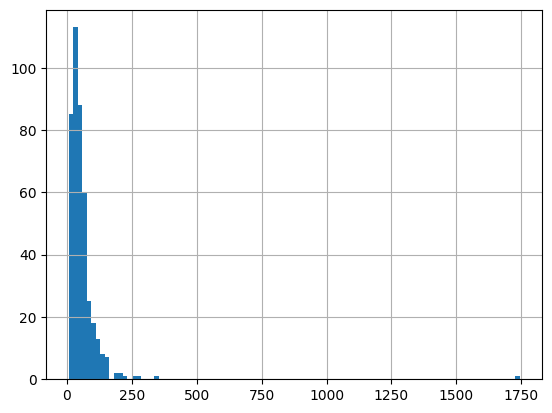

In [1768]:
combined['mql_count'].hist(bins=100)

In [1769]:
combined['mql_count'].quantile(0.95)

np.float64(131.75)

In [1770]:
# Filter for GA3 data
combined = combined[combined['date']<pd.Timestamp('2025-05-01').date()]
combined['averageMQL'] = (combined['mql_count'].shift(1) + combined['mql_count'].shift(-1)) / 2
combined['smoothed_MQL'] = np.where(combined['mql_count']>130,combined['averageMQL'] , combined['mql_count'])

In [1771]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,durable_goods_rates,consumer_sentiment_index,averageMQL,smoothed_MQL
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,0.0,340,3220.0,10,11866.0,0.026,0.0079,70.5,79.0,79.0


In [1772]:
combined['daily_avg_queries'] = combined['daily_avg_queries'].fillna(combined['daily_avg_queries'].mean())
combined['durable_goods_rates'] = combined['durable_goods_rates'].fillna(combined['durable_goods_rates'].mean())
combined['inflation_rate'] = combined['inflation_rate'].fillna(combined['inflation_rate'].mean())

In [1773]:
train_small = combined[combined['date']<=pd.Timestamp('2024-10-11').date()]
test_small = combined[(combined['date']>pd.Timestamp('2024-10-11').date()) & (combined['date']<pd.Timestamp('2024-12-11').date())]

In [1774]:
train_small[train_small['durable_goods_rates'].isna()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,durable_goods_rates,consumer_sentiment_index,averageMQL,smoothed_MQL


In [1775]:
train_small.to_csv('mmm_train_small.csv')
test_small.to_csv('mmm_test_small.csv')

In [1776]:
train_small.shape

(184, 31)

In [1777]:
len(['ga4_sessions',
 'podcast_streams',
 'linkedin_spend',
 'linkedin_impressions',
 'linkedin_clicks',
 'gSearch_sessions',
 'gSearch_impressions',
 'gift_spend',
 'email_opened_cnt',
 'direct_spend',
 'fb_spend',
 'fb_impressions',
 'fb_clicks',
 'googleAds_spend',
 'googleAds_impressions',
 'daily_avg_queries'])

16

In [1778]:
train_all = combined[combined['date']<=pd.Timestamp('2025-03-11').date()]
test_all = combined[combined['date']>pd.Timestamp('2025-03-11').date()]

In [1779]:
train_all.columns

Index(['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions',
       'podcast_streams', 'linkedin_spend', 'linkedin_impressions',
       'linkedin_clicks', 'gSearch_sessions', 'gSearch_impressions',
       'gift_spend', 'email_sent_cnt', 'email_delivered_cnt',
       'email_opened_cnt', 'direct_spend', 'fb_spend', 'fb_impressions',
       'fb_clicks', 'googleAds_spend', 'googleAds_impressions', 'event_spend',
       'mql_count', 'impactDotCom_ga4_sessions', 'month', 'daily_avg_queries',
       'inflation_rate', 'durable_goods_rates', 'consumer_sentiment_index',
       'averageMQL', 'smoothed_MQL'],
      dtype='object')

In [1780]:
test_all[test_all['daily_avg_queries'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,durable_goods_rates,consumer_sentiment_index,averageMQL,smoothed_MQL


In [1781]:
caseDF = train_all[train_all['durable_goods_rates'].isna()==True]
caseDF['iso_year']

Series([], Name: iso_year, dtype: int64)

In [1782]:
import pandas as pd

# Assuming your DataFrame has a date column called 'date'
df = train_all.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Find gaps larger than 1 day
df['date_diff'] = df['date'].diff().dt.days
non_sequential = df[df['date_diff'] > 1]
print(non_sequential)


Empty DataFrame
Columns: [model_week, date, iso_week, iso_year, ga4_sessions, podcast_streams, linkedin_spend, linkedin_impressions, linkedin_clicks, gSearch_sessions, gSearch_impressions, gift_spend, email_sent_cnt, email_delivered_cnt, email_opened_cnt, direct_spend, fb_spend, fb_impressions, fb_clicks, googleAds_spend, googleAds_impressions, event_spend, mql_count, impactDotCom_ga4_sessions, month, daily_avg_queries, inflation_rate, durable_goods_rates, consumer_sentiment_index, averageMQL, smoothed_MQL, date_diff]
Index: []

[0 rows x 32 columns]


In [1783]:
train_all.drop_duplicates()

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,durable_goods_rates,consumer_sentiment_index,averageMQL,smoothed_MQL
0,202415,2024-04-11,15,2024,209194.0,332.0,11063.50,186008,1265,1324.0,...,0.0,61,4972.0,4,16753.0,0.0336,0.0022,77.2,NaN,61.0
1,202415,2024-04-12,15,2024,167947.0,227.0,10985.40,167930,1187,1127.0,...,0.0,60,4538.0,4,16753.0,0.0336,0.0022,77.2,41.0,60.0
2,202415,2024-04-13,15,2024,76022.0,186.0,8826.29,124526,930,504.0,...,0.0,21,2430.0,4,16753.0,0.0336,0.0022,77.2,45.0,21.0
3,202415,2024-04-14,15,2024,93371.0,120.0,7257.84,111431,844,519.0,...,0.0,30,2546.0,4,16753.0,0.0336,0.0022,77.2,68.5,30.0
4,202416,2024-04-15,16,2024,219057.0,182.0,10275.43,159627,1160,1133.0,...,0.0,116,7164.0,4,16753.0,0.0336,0.0022,77.2,41.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,202510,2025-03-07,10,2025,194657.0,85.0,14307.41,215879,1792,1046.0,...,0.0,31,2955.0,3,12539.0,0.0239,0.0936,57.0,23.5,31.0
331,202510,2025-03-08,10,2025,100090.0,64.0,13003.80,191404,1459,538.0,...,0.0,12,2030.0,3,12539.0,0.0239,0.0936,57.0,23.5,12.0
332,202510,2025-03-09,10,2025,153525.0,130.0,9425.18,130822,923,556.0,...,0.0,16,1587.0,3,12539.0,0.0239,0.0936,57.0,54.0,16.0
333,202511,2025-03-10,11,2025,265489.0,94.0,11580.42,171212,1453,1262.0,...,0.0,96,3876.0,3,12539.0,0.0239,0.0936,57.0,21.5,96.0


In [1784]:
train_all[['date', 'mql_count']]

,date,mql_count
0,2024-04-11,61
1,2024-04-12,60
2,2024-04-13,21
3,2024-04-14,30
4,2024-04-15,116
...,...,...
330,2025-03-07,31
331,2025-03-08,12
332,2025-03-09,16
333,2025-03-10,96


In [1785]:
train_all.to_csv('mmm_train_all.csv')
test_all.to_csv('mmm_test_all.csv')

In [1708]:
train_all.shape

(335, 31)

In [1709]:
test_all

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,durable_goods_rates,consumer_sentiment_index,averageMQL,smoothed_MQL
335,202511,2025-03-12,11,2025,300243.0,348.0,13204.330000,179760,1492,1418.0,...,0.0,40,5468.0,3,12539.0,0.0239,0.0936,57.0,148.0,40.0
336,202511,2025-03-13,11,2025,273904.0,244.0,12500.210000,176581,1632,1316.0,...,0.0,269,4356.0,3,12539.0,0.0239,0.0936,57.0,42.0,42.0
337,202511,2025-03-14,11,2025,205156.0,142.0,11772.030000,173769,1431,1079.0,...,0.0,44,3326.0,3,12539.0,0.0239,0.0936,57.0,146.0,44.0
338,202511,2025-03-15,11,2025,105544.0,142.0,9236.310000,129076,1116,504.0,...,0.0,23,1698.0,3,12539.0,0.0239,0.0936,57.0,33.0,23.0
339,202511,2025-03-16,11,2025,183739.0,92.0,8036.110000,109828,973,608.0,...,0.0,22,2916.0,3,12539.0,0.0239,0.0936,57.0,88.0,22.0
340,202512,2025-03-17,12,2025,272562.0,180.0,9812.790000,157539,1418,1364.0,...,0.0,153,4541.0,3,12539.0,0.0239,0.0936,57.0,70.5,70.5
341,202512,2025-03-18,12,2025,312833.0,192.0,10140.680000,155377,1386,1371.0,...,0.0,119,4396.0,3,12539.0,0.0239,0.0936,57.0,110.0,119.0
342,202512,2025-03-19,12,2025,310962.0,191.0,10369.790000,153377,1276,1498.0,...,0.0,67,3768.0,3,12539.0,0.0239,0.0936,57.0,95.0,67.0
343,202512,2025-03-20,12,2025,264027.0,136.0,9258.690000,141164,1300,1251.0,...,0.0,71,5537.0,3,12539.0,0.0239,0.0936,57.0,51.0,71.0
344,202512,2025-03-21,12,2025,195784.0,95.0,8559.350000,129981,1045,998.0,...,0.0,35,3325.0,3,12539.0,0.0239,0.0936,57.0,44.5,35.0


# MQl Qc

In [797]:
mqls_merged

,model_week,iso_week,iso_year,date,mql_count,mql_count_mql_lead_status,ratio
0,202517,17,2025,2025-04-22,1743,580,0.332760
1,202428,28,2024,2024-07-12,75,51,0.680000
2,202438,38,2024,2024-09-20,49,34,0.693878
3,202422,22,2024,2024-05-27,61,43,0.704918
4,202506,6,2025,2025-02-05,89,60,0.674157
...,...,...,...,...,...,...,...
436,202503,3,2025,2025-01-18,28,22,0.785714
437,202451,51,2024,2024-12-21,24,16,0.666667
438,202519,19,2025,2025-05-11,10,6,0.600000
439,202518,18,2025,2025-05-04,11,8,0.727273


In [790]:
demoRequests = google_web_events_ga4[(google_web_events_ga4['domain']=='impact.com') & (google_web_events_ga4['domainsub1'].isin(['request-a-demo-thank-you'])==True)]

In [791]:
demoRequests

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1
24089,202511,2025-03-11,11,2025,184.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
28340,202504,2025-01-22,4,2025,148.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
30689,202510,2025-03-03,10,2025,148.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
32322,202514,2025-04-01,14,2025,148.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
39669,202505,2025-01-27,5,2025,111.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
...,...,...,...,...,...,...,...,...,...
189706,202419,2024-05-09,19,2024,80.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
189943,202419,2024-05-10,19,2024,80.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
196365,202422,2024-05-31,22,2024,80.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you
197008,202423,2024-06-03,23,2024,80.0,https://impact.com/request-a-demo-thank-you/,"[https:, , impact.com, request-a-demo-thank-yo...",impact.com,request-a-demo-thank-you


In [792]:
demoRequests[['model_week', 'ga4_sessions']]

,model_week,ga4_sessions
24089,202511,184.0
28340,202504,148.0
30689,202510,148.0
32322,202514,148.0
39669,202505,111.0
...,...,...
189706,202419,80.0
189943,202419,80.0
196365,202422,80.0
197008,202423,80.0


In [794]:
compare = pd.merge(mqls_merged[['date', 'mql_count_mql_lead_status', 'mql_count_mql_lead_status']], demoRequests[['date', 'ga4_sessions']], on='date')

In [795]:
compare

,date,mql_count_mql_lead_status,mql_count_mql_lead_status,ga4_sessions
0,2024-09-20,34,34,119.0
1,2024-05-27,43,43,119.0
2,2024-04-12,25,25,80.0
3,2024-04-21,11,11,119.0
4,2024-05-02,30,30,159.0
...,...,...,...,...
57,2025-04-23,9,9,74.0
58,2025-04-25,8,8,74.0
59,2025-04-27,4,4,74.0
60,2025-06-05,15,15,111.0


# EDA

In [942]:
combined.columns

Index(['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions',
       'podcast_streams', 'linkedin_spend', 'linkedin_impressions',
       'linkedin_clicks', 'gSearch_sessions', 'gSearch_impressions',
       'gift_spend', 'email_opened_cnt', 'direct_spend', 'fb_spend',
       'fb_impressions', 'fb_clicks', 'googleAds_spend',
       'googleAds_impressions', 'event_spend', 'mql_count',
       'mql_count_mql_lead_status', 'ratio', 'impactDotCom_ga4_sessions',
       'month', 'daily_avg_queries', 'inflation_rate', 'durable_goods_rates',
       'consumer_sentiment_index', 'averageMQL', 'smoothed_MQL'],
      dtype='object')

/var/folders/rt/jvrnppjd0lx_hpnwh05y501m0000gn/T/ipykernel_28481/2373633089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_all['linkedin_spendToImp_ratio'] = train_all['linkedin_spend']/train_all['linkedin_impressions']


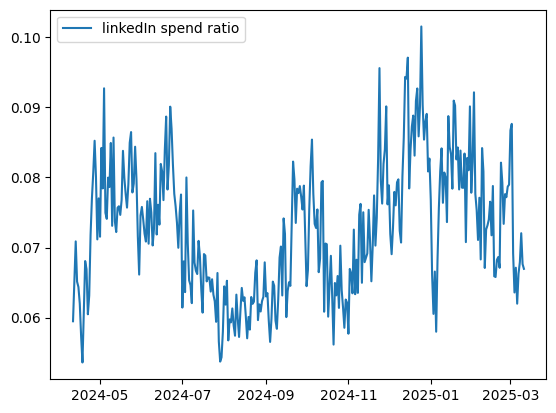

In [957]:
train_all['linkedin_spendToImp_ratio'] = train_all['linkedin_spend']/train_all['linkedin_impressions']

x = train_all['date']
y1 = train_all['linkedin_spendToImp_ratio']
y2 = train_all['mql_count']

plt.plot(x, y1, label='linkedIn spend ratio')
#plt.plot(x, y2, label='mql')
plt.legend()
plt.show()

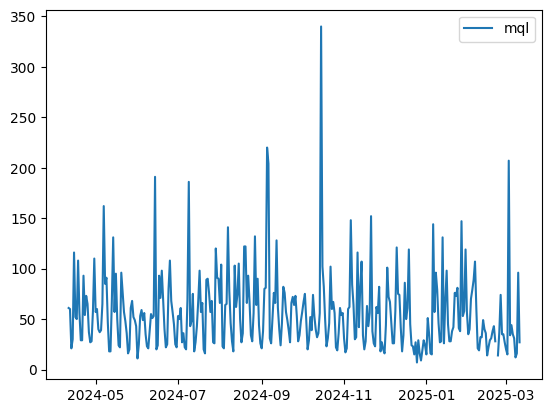

In [959]:
x = train_all['date']

y2 = train_all['mql_count']

#plt.plot(x, y1, label='linkedIn spend ratio')
plt.plot(x, y2, label='mql')
plt.legend()
plt.show()

In [962]:
highMQL = train_all[train_all['mql_count']>80]
highMQL['linkedin_spendToImp_ratio'].mean()

np.float64(0.06942314241715213)

In [963]:
train_all['linkedin_spendToImp_ratio'].mean()

np.float64(0.07258550828013521)

In [964]:
regMQL = train_all[train_all['mql_count']<=80]
regMQL['linkedin_spendToImp_ratio'].mean()

np.float64(0.07325719950625172)

In [948]:
combined['linkedin_impToSpend_ratio'].min()
combined['linkedin_impToSpend_ratio'].max()

np.float64(18.65812925124074)

In [ ]:
parts = ['first_half', 'second_half']

    x = subset['date']
    y = subset['mql_count']
    plt.plot(x, y, label='Original Data')
    plt.legend()
    plt.show()

In [836]:
df = mqls_merged.copy()

In [838]:
df['date'] =  df['date'].apply(lambda x:  datetime.datetime.strptime(str(x),"%Y-%m-%d"))
df = pd.concat((df, pd.get_dummies(df['date'].dt.day_name())), axis=1)

In [840]:
df.columns

Index(['model_week', 'iso_week', 'iso_year', 'date', 'mql_count',
       'mql_count_mql_lead_status', 'ratio', 'delta_over_40', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [842]:
days = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [851]:
df['day']=df['date'].apply(lambda x: x.day)

In [856]:
df['day']

0      22
1      12
2      20
3      27
4       5
       ..
436    18
437    21
438    11
439     4
440    17
Name: day, Length: 441, dtype: int64

In [858]:
df['part_of_month'] = np.where(df['day']<=15, 'first_half', 'second_half')

In [859]:
df

,model_week,iso_week,iso_year,date,mql_count,mql_count_mql_lead_status,ratio,delta_over_40,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,day,part_of_month
0,202517,17,2025,2025-04-22,1743,580,0.332760,1703,False,False,False,False,False,True,False,22,second_half
1,202428,28,2024,2024-07-12,75,51,0.680000,35,True,False,False,False,False,False,False,12,first_half
2,202438,38,2024,2024-09-20,49,34,0.693878,9,True,False,False,False,False,False,False,20,second_half
3,202422,22,2024,2024-05-27,61,43,0.704918,21,False,True,False,False,False,False,False,27,second_half
4,202506,6,2025,2025-02-05,89,60,0.674157,49,False,False,False,False,False,False,True,5,first_half
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,202503,3,2025,2025-01-18,28,22,0.785714,0,False,False,True,False,False,False,False,18,second_half
437,202451,51,2024,2024-12-21,24,16,0.666667,0,False,False,True,False,False,False,False,21,second_half
438,202519,19,2025,2025-05-11,10,6,0.600000,0,False,False,False,True,False,False,False,11,first_half
439,202518,18,2025,2025-05-04,11,8,0.727273,0,False,False,False,True,False,False,False,4,first_half


Wednesday
46.06310679611651


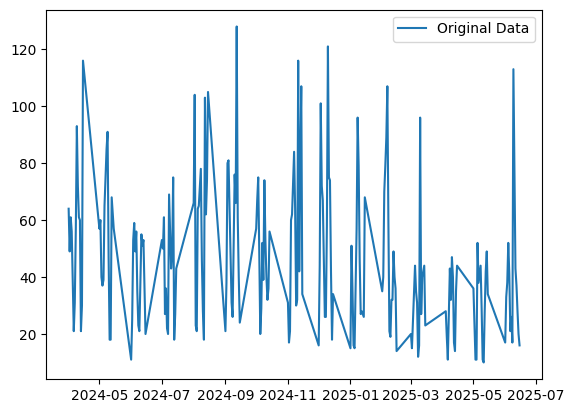

Wednesday
49.17619047619048


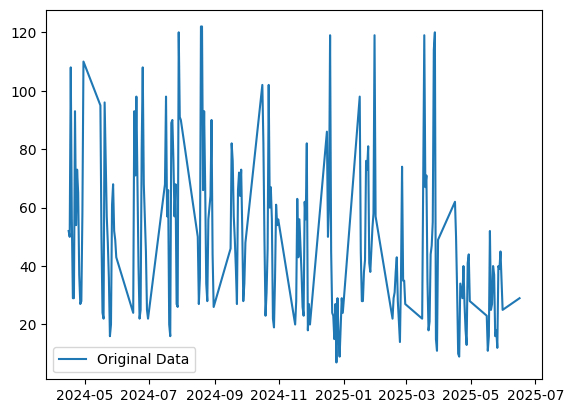

In [863]:
parts = ['first_half', 'second_half']
for part in parts:
    subset = df[(df['part_of_month']==part) & (df['mql_count']<130)].sort_values('date')
    print(day)
    print(subset['mql_count'].mean())
    x = subset['date']
    y = subset['mql_count']
    plt.plot(x, y, label='Original Data')
    plt.legend()
    plt.show()

Friday
45.42372881355932


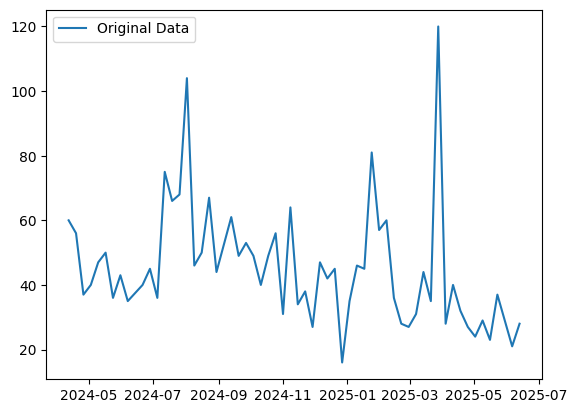

Monday
59.62068965517241


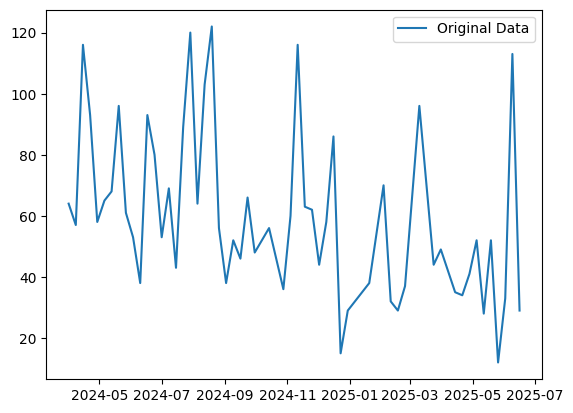

Saturday
22.548387096774192


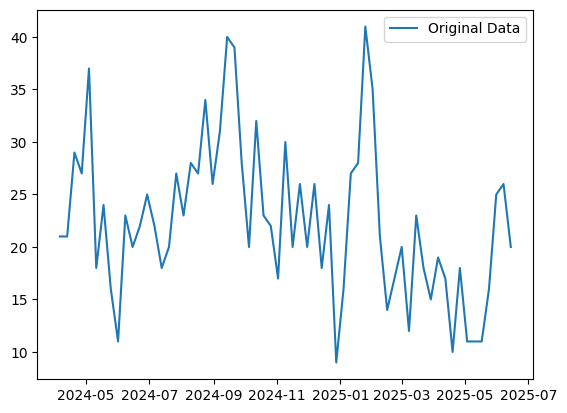

Sunday
22.793650793650794


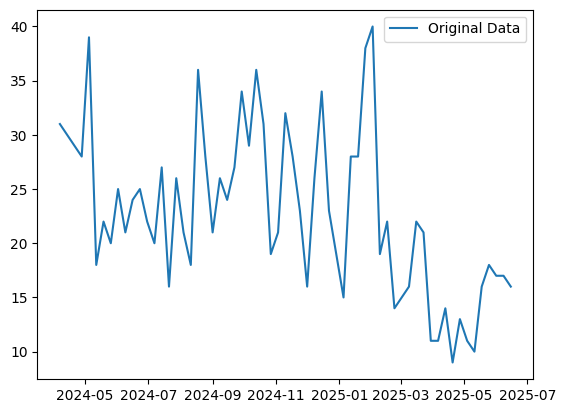

Thursday
65.37288135593221


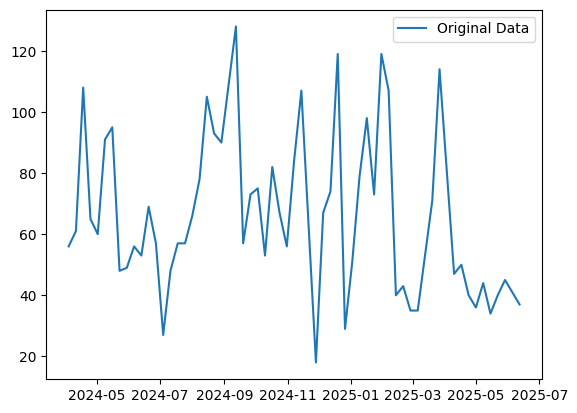

Tuesday
61.345454545454544


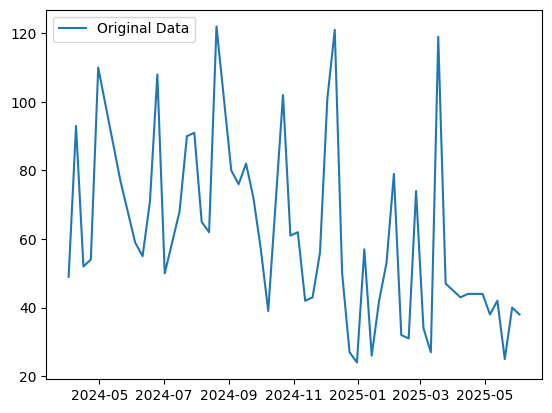

Wednesday
60.21666666666667


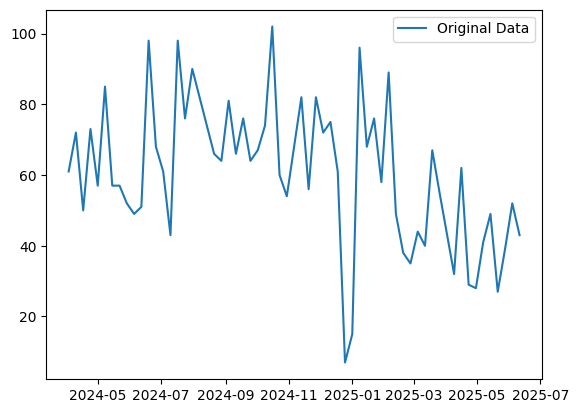

In [849]:
for day in days:
    subset = df[(df[day]==True) & (df['mql_count']<130)].sort_values('date')
    print(day)
    print(subset['mql_count'].mean())
    x = subset['date']
    y = subset['mql_count']
    plt.plot(x, y, label='Original Data')
    plt.legend()
    plt.show()

In [ ]:
plt.plot(x, y, label='Original Data')
plt.legend()
plt.show()

## Source Data

In [909]:
source_channel = pd.read_csv(folder_path+'/'+'source_channel_daily_data.csv')

In [937]:
table = source_channel[['source_channel_vendor', 'cnt_cases']].groupby('source_channel_vendor').sum().sort_values(by='cnt_cases', ascending=False).reset_index()
table[:5]

,source_channel_vendor,cnt_cases
0,Linkedin,10485
1,Facebook,1902
2,PharosIQ,1074
3,Adwords,884
4,Qualified.com,804


In [ ]:
Linkedin['']

In [910]:
source_channel = source_channel.rename({'lead_mql_date':'date'}, axis=1)

In [911]:
source_channel['date']= source_channel['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())

In [912]:
df = combined[combined['mql_count']>60]
df=df[['date', 'mql_count']]

In [913]:
df =pd.merge(df, source_channel, how='left', on='date')

In [915]:
df['perc_total']= df['cnt_cases']/df['mql_count']

In [918]:
high_df=df[df['perc_total']>0.4]

In [920]:
high_df

,date,mql_count,source_channel_vendor,cnt_cases,perc_total
1,2024-04-11,61.0,Linkedin,34,0.557377
6,2024-04-15,116.0,Linkedin,59,0.508621
14,2024-04-18,108.0,Linkedin,67,0.620370
21,2024-04-22,93.0,Linkedin,66,0.709677
24,2024-04-24,73.0,NaN,31,0.424658
...,...,...,...,...,...
825,2025-04-03,146.0,Linkedin,99,0.678082
833,2025-04-07,144.0,PharosIQ,96,0.666667
838,2025-04-16,62.0,Linkedin,25,0.403226
839,2025-04-16,62.0,NaN,30,0.483871


In [921]:
high_df[['source_channel_vendor', 'perc_total']].groupby('source_channel_vendor').count()

,perc_total
source_channel_vendor,
DigitalCommerce360,2
Linkedin,86
Marketing Dive,1
PharosIQ,4


In [930]:
high_df[['source_channel_vendor', 'perc_total']].groupby('source_channel_vendor').mean()

,perc_total
source_channel_vendor,
DigitalCommerce360,0.539300
Linkedin,0.568223
Marketing Dive,0.460784
PharosIQ,0.721816


In [928]:
case2 = high_df[high_df['source_channel_vendor']=='Linkedin']
case2['cnt_cases'].mean()

np.float64(60.72093023255814)

In [929]:
case1 = source_channel[source_channel['source_channel_vendor']=='Linkedin']
case1['cnt_cases'].mean()

np.float64(24.327146171693734)

In [966]:
combined[combined['mql_count']>100].shape

(45, 33)

In [967]:
combined.shape

(385, 33)

In [968]:
45/385

0.11688311688311688

## Dates Analysis

In [1309]:
df = pd.read_csv(folder_path + '/' +  'date_milestone_analysis.csv')

In [1314]:
df['lead_mql_date'].min()

'2024-04-01'

In [1321]:
df

,lead_mql_date,mql_matches_lead,mql_matches_demo,lead_matches_demo,all_dates_match,linkedin,cnt_all
0,2025-04-22,31,33,53,26,22,605
4,2025-02-05,39,38,28,27,30,89
6,2024-09-17,39,29,23,23,35,82
10,2024-04-05,41,18,18,17,120,143
12,2024-04-09,47,22,21,21,63,92
...,...,...,...,...,...,...,...
368,2025-01-06,21,20,15,15,107,144
377,2025-04-02,34,24,19,19,109,141
396,2025-03-17,137,32,30,29,119,153
397,2025-03-28,30,19,16,16,94,119


In [1337]:
df[(df['cnt_all']>140)]

,lead_mql_date,mql_matches_lead,mql_matches_demo,lead_matches_demo,all_dates_match,linkedin,cnt_all
10,2024-04-05,41,18,18,17,120,143
28,2024-05-07,55,35,26,26,107,162
50,2024-11-21,47,30,22,22,83,152
61,2024-07-09,52,29,29,29,117,184
88,2024-09-06,163,19,17,17,19,204
104,2024-10-15,45,28,24,23,263,339
114,2024-11-06,50,17,15,14,101,148
155,2025-01-27,107,21,14,13,30,147
174,2025-03-03,17,15,9,9,1,207
186,2025-04-03,31,27,20,20,96,146


In [ ]:
df = df[(df['cnt_all']>80) & (df['cnt_all']<500)]
x = df['lead_mql_date'].to_numpy()
y1 = df['linkedin'].to_numpy()
y2 = df['mql_matches_lead'].to_numpy()
y3 = df['all_dates_match'].to_numpy()
all = df['cnt_all'].to_numpy()

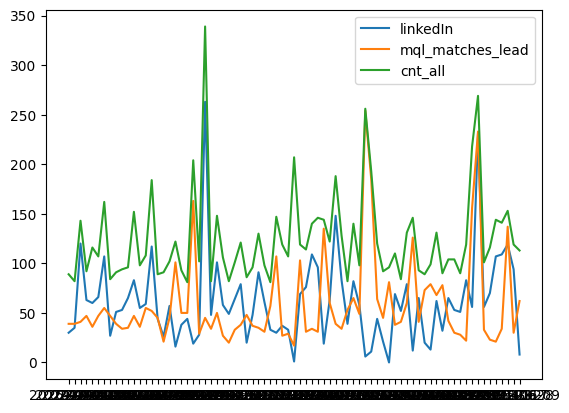

In [1327]:
plt.plot(x, y1, label='linkedIn')
plt.plot(x, y2, label='mql_matches_lead')
#plt.plot(x, y3, label='all_dates_match')
plt.plot(x, all, label='cnt_all')
plt.legend()
plt.show()

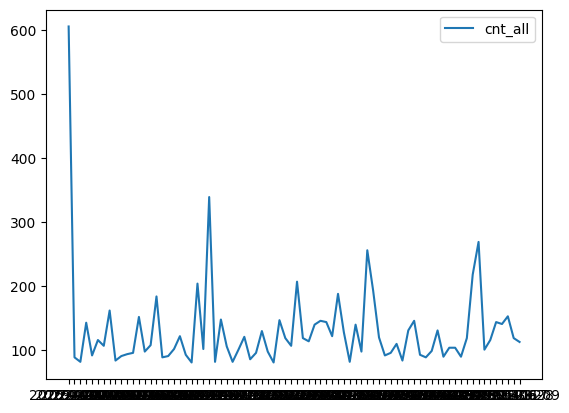

In [1319]:
#plt.plot(x, y1, label='linkedIn')
#plt.plot(x, y2, label='mql_matches_lead')
plt.plot(x, all, label='cnt_all')
plt.legend()
plt.show()

In [1331]:
spend = combined.copy()
spend

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,mql_count,mql_restricted,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,durable_goods_rates,consumer_sentiment_index,averageMQL,smoothed_MQL
0,202415,2024-04-11,15,2024,209194.0,332.0,11063.50,186008,1265,1324.0,...,61,40,4972.0,4,16753.0,0.0336,0.0022,77.2,NaN,61.0
1,202415,2024-04-12,15,2024,167947.0,227.0,10985.40,167930,1187,1127.0,...,60,33,4538.0,4,16753.0,0.0336,0.0022,77.2,41.0,60.0
2,202415,2024-04-13,15,2024,76022.0,186.0,8826.29,124526,930,504.0,...,21,16,2430.0,4,16753.0,0.0336,0.0022,77.2,45.0,21.0
3,202415,2024-04-14,15,2024,93371.0,120.0,7257.84,111431,844,519.0,...,30,17,2546.0,4,16753.0,0.0336,0.0022,77.2,68.5,30.0
4,202416,2024-04-15,16,2024,219057.0,182.0,10275.43,159627,1160,1133.0,...,116,92,7164.0,4,16753.0,0.0336,0.0022,77.2,41.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,202517,2025-04-26,17,2025,81901.0,733.0,6231.58,80463,852,465.0,...,18,12,1957.0,4,12832.0,0.0231,-0.0630,52.2,20.0,18.0
381,202517,2025-04-27,17,2025,162122.0,573.0,5570.86,72831,970,543.0,...,13,5,3474.0,4,12832.0,0.0231,-0.0630,52.2,29.5,13.0
382,202518,2025-04-28,18,2025,267798.0,3326.0,6411.23,106888,1556,1332.0,...,41,22,3805.0,4,12832.0,0.0231,-0.0630,52.2,28.5,41.0
383,202518,2025-04-29,18,2025,287476.0,295.0,8470.89,128461,1442,1279.0,...,44,28,3287.0,4,12832.0,0.0231,-0.0630,52.2,34.5,44.0
